# Objective: analyze dataset to determine a standard size

In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import glob

data_path = 'C:/OpenClassRooms/projet 6/Images/'

In [2]:
df = []
for breed in os.listdir(data_path):
    for dog in os.listdir(data_path + breed):
        img = cv2.imread(data_path + breed + '/' + dog)
        df.append((img.shape[0], img.shape[1], img.shape[0] / img.shape[1]))
df = pd.DataFrame(df, columns=['Height', 'Width', 'Ratio'])

In [3]:
n_breeds = len(os.listdir(data_path))
n_images = df.shape[0]
print(f'Dataset contains {n_breeds} breeds and a total of {n_images} images.')

Dataset contains 120 breeds and a total of 20580 images.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,20580.0,385.861224,124.863446,100.00000,333.000000,375.00,453.000000,2562.000000
Width,20580.0,442.531876,142.792308,97.00000,361.000000,500.00,500.000000,3264.000000
Ratio,20580.0,0.912368,0.287046,0.27521,0.747826,0.75,1.079914,2.540816


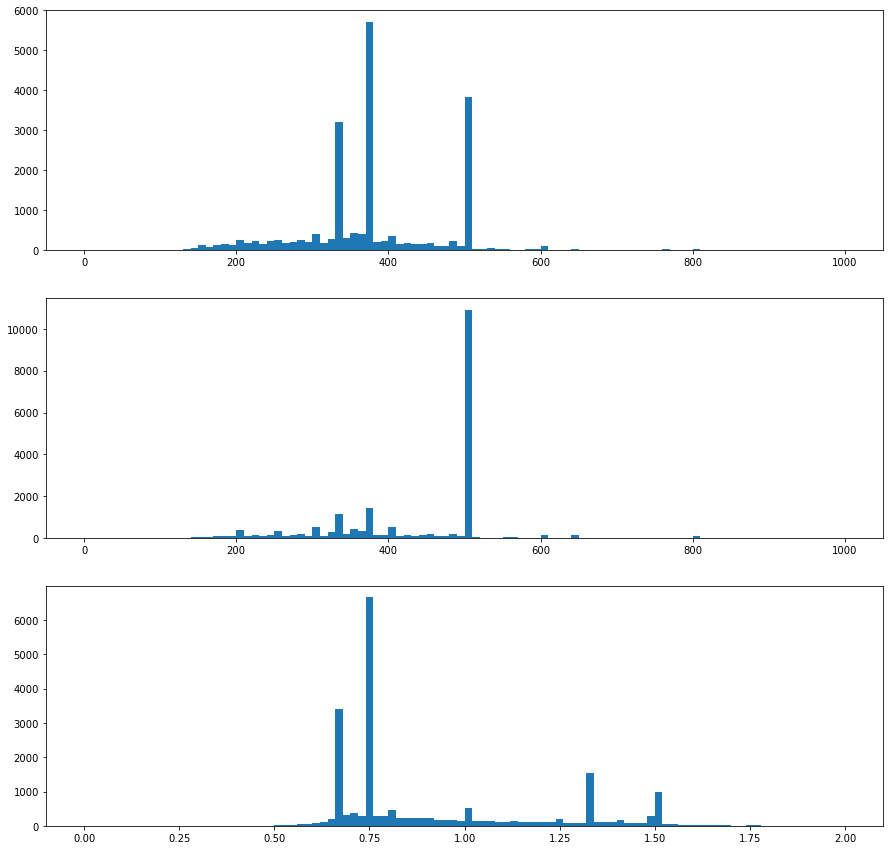

In [5]:
f = plt.figure(figsize=(15, 15)) 

plt.subplot(311)
plt.hist(df['Height'], bins=100, range=(0, 1000))
plt.subplot(312)
plt.hist(df['Width'], bins=100, range=(0, 1000))
plt.subplot(313)
plt.hist(df['Ratio'], bins=100, range=(0, 2))

plt.show()

# Most common dimension seems to be 500x375 (ratio 0.75)

In [25]:
join_table = pd.DataFrame(sorted(glob.glob('./Images/*/*')), columns = ['path'])
join_table.head()

,path
0,./Images\n02085620-Chihuahua\n02085620_10074.jpg
1,./Images\n02085620-Chihuahua\n02085620_10131.jpg
2,./Images\n02085620-Chihuahua\n02085620_10621.jpg
3,./Images\n02085620-Chihuahua\n02085620_1073.jpg
4,./Images\n02085620-Chihuahua\n02085620_10976.jpg


In [26]:
join_table['file_name'] = join_table['path'].apply(lambda x: x.split('/')[-1].replace('.jpg',''))

In [27]:
join_table

,path,file_name
0,./Images\n02085620-Chihuahua\n02085620_10074.jpg,Images\n02085620-Chihuahua\n02085620_10074
1,./Images\n02085620-Chihuahua\n02085620_10131.jpg,Images\n02085620-Chihuahua\n02085620_10131
2,./Images\n02085620-Chihuahua\n02085620_10621.jpg,Images\n02085620-Chihuahua\n02085620_10621
3,./Images\n02085620-Chihuahua\n02085620_1073.jpg,Images\n02085620-Chihuahua\n02085620_1073
4,./Images\n02085620-Chihuahua\n02085620_10976.jpg,Images\n02085620-Chihuahua\n02085620_10976
...,...,...
20575,./Images\n02116738-African_hunting_dog\n021167...,Images\n02116738-African_hunting_dog\n02116738...
20576,./Images\n02116738-African_hunting_dog\n021167...,Images\n02116738-African_hunting_dog\n02116738...
20577,./Images\n02116738-African_hunting_dog\n021167...,Images\n02116738-African_hunting_dog\n02116738...
20578,./Images\n02116738-African_hunting_dog\n021167...,Images\n02116738-African_hunting_dog\n02116738...


In [29]:
join_table['labels'] = join_table['path'].apply(lambda x: x.split('\\')[-2].split('-',1)[1])
join_table.labels.value_counts()

Maltese_dog            252
Afghan_hound           239
Scottish_deerhound     232
Pomeranian             219
Samoyed                218
                      ... 
groenendael            150
Irish_water_spaniel    150
kuvasz                 150
Pekinese               149
redbone                148
Name: labels, Length: 120, dtype: int64

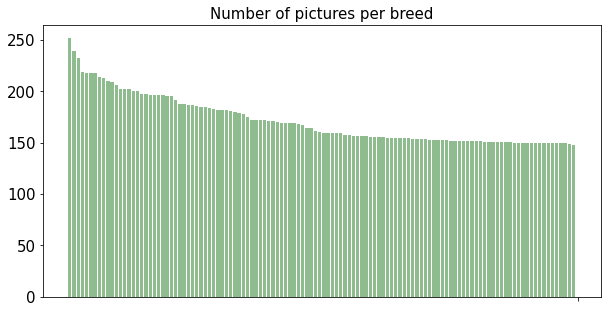

In [30]:
a = (join_table['labels'].value_counts())
fig = plt.figure(figsize = (10,5))
plt.bar(x = a.index, height = a, color = 'darkseagreen')
plt.xticks('')
plt.title('Number of pictures per breed', fontsize = 15)
plt.yticks(fontsize = 15)
fig.savefig("count.png", transparent = True)

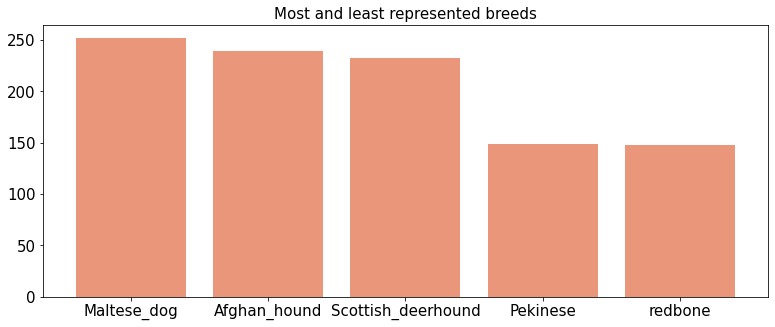

In [31]:
fig = plt.figure(figsize = (13,5))
plt.bar(x = a[(a > 230) | (a < 150)].index, height = a[(a > 230) | (a < 150)], color = 'darksalmon')
plt.xticks(fontsize = 15)
plt.title('Most and least represented breeds', fontsize = 15)
plt.yticks(fontsize = 15)
fig.savefig("most_rep.png", transparent = True)

In [32]:
join_table.head()

,path,file_name,labels
0,./Images\n02085620-Chihuahua\n02085620_10074.jpg,Images\n02085620-Chihuahua\n02085620_10074,Chihuahua
1,./Images\n02085620-Chihuahua\n02085620_10131.jpg,Images\n02085620-Chihuahua\n02085620_10131,Chihuahua
2,./Images\n02085620-Chihuahua\n02085620_10621.jpg,Images\n02085620-Chihuahua\n02085620_10621,Chihuahua
3,./Images\n02085620-Chihuahua\n02085620_1073.jpg,Images\n02085620-Chihuahua\n02085620_1073,Chihuahua
4,./Images\n02085620-Chihuahua\n02085620_10976.jpg,Images\n02085620-Chihuahua\n02085620_10976,Chihuahua
